# Aitchison & Greenacre 2002
___

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

import toolbox.toolbox as tb
import matplotlib.pyplot as plt

___

In [2]:
df = pd.read_excel("Color_dataframe.xlsx", index_col=0)

In [3]:
df = tb.normalize(df)

In [4]:
df_clr = tb.clr(df)

In [6]:
pca = PCA()
pca.fit(df_clr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [7]:
df_pca = pd.DataFrame(pca.transform(df_clr))

In [8]:
df_pca

,0,1,2,3,4,5
0,-0.721236,-0.248230,-0.066755,-0.014127,-0.016040,1.466292e-15
1,-0.111420,-0.075459,-0.127162,0.028609,-0.007270,-4.933314e-16
2,1.032567,-0.135990,-0.085945,0.008936,-0.009851,1.319616e-15
3,-0.239357,0.009263,0.055518,-0.017763,-0.005929,8.581900e-17
4,-0.571652,0.398011,0.112128,-0.054711,-0.007817,1.461541e-16
5,0.792849,-0.266521,0.146510,0.001315,-0.005645,4.159141e-16
6,0.084232,-0.118505,0.014907,-0.028770,-0.007599,-1.215256e-15
7,-0.969086,-0.310964,-0.104879,0.032423,-0.013453,-8.763309e-16
8,1.260364,0.264546,-0.100166,0.048719,-0.010707,6.333881e-16
9,-0.841158,0.139820,0.044368,-0.011848,0.006205,-6.586105e-16


In [15]:
## project data into PC space

# 0,1 denote PC1 and PC2
xloading = np.negative(pca.components_[0])
yloading = np.negative(pca.components_[1])

# Negative used so that values are plotted the same
# as in Aitchison & Greenacre (2002)
# If not the case, remove the np.negative
xscore = np.negative(pca.transform(df_clr)[:,0])
yscore = np.negative(pca.transform(df_clr)[:,1])

S = pca.singular_values_

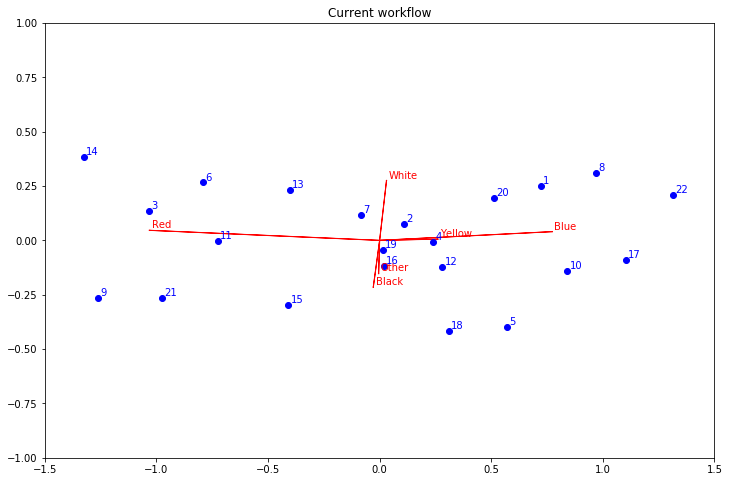

In [16]:
# Visualize projections
fig, ax = plt.subplots(figsize=(12,8))
    
for i in range(len(xloading)):
# Arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xloading[i]*max(xscore), yloading[i]*max(yscore),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xloading[i]*max(xscore) + 0.01, 
             yloading[i]*max(yscore) + 0.01,
             list(df_clr.columns.values)[i], color='r')

for i in range(len(xscore)):
# Circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xscore[i], yscore[i], 'bo')
    plt.text(xscore[i]+0.01, yscore[i]+0.01, list(df_clr.index)[i], color='b')

plt.title("Current workflow")
    
plt.xlim(-1.5, 1.5)
plt.ylim(-1, 1)

plt.show();

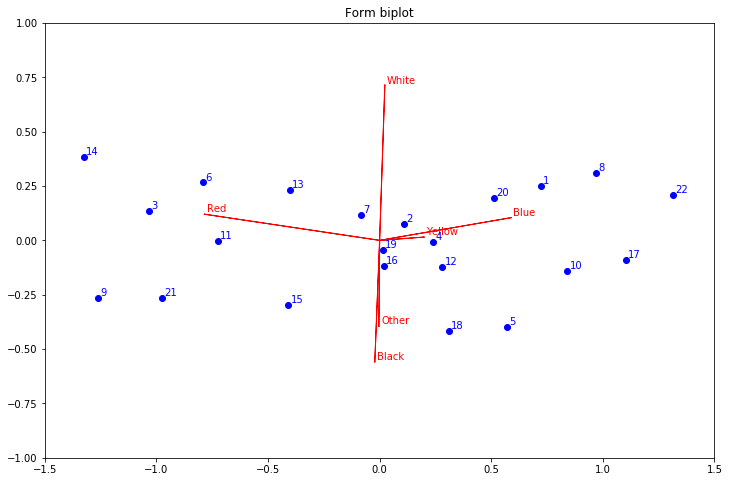

In [17]:
# Visualize projections
fig, ax = plt.subplots(figsize=(12,8))
    
for i in range(len(xloading)):
# Arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xloading[i], yloading[i],
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xloading[i] + 0.01, 
             yloading[i] + 0.01,
             list(df_clr.columns.values)[i], color='r')

for i in range(len(xscore)):
# Circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xscore[i], yscore[i], 'bo')
    plt.text(xscore[i]+0.01, yscore[i]+0.01, list(df_clr.index)[i], color='b')

plt.title("Form biplot")    

plt.xlim(-1.5, 1.5)
plt.ylim(-1, 1)

plt.show();

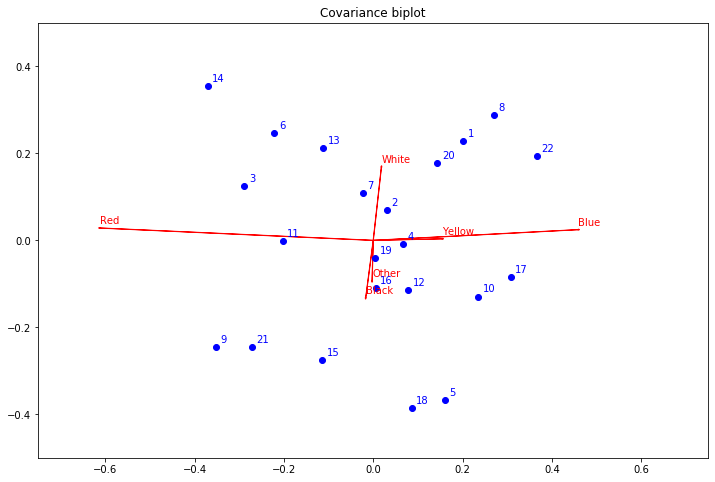

In [18]:
# Visualize projections
fig, ax = plt.subplots(figsize=(12,8))
    
for i in range(len(xloading)):
# Arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, 
              xloading[i]*S[0]/(np.sqrt(xscore.shape[0] - 1)), 
              yloading[i]*S[1]/(np.sqrt(yscore.shape[0] - 1)),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xloading[i]*S[0]/(np.sqrt(xscore.shape[0] - 1)), 
             yloading[i]*S[1]/(np.sqrt(yscore.shape[0] - 1)) + 0.01,
             list(df_clr.columns.values)[i], color='r')

for i in range(len(xscore)):
# Circles project documents (ie rows from csv) as points onto PC axes
    plt.plot((xscore/S[0])[i], (yscore/S[1])[i], 'bo')
    plt.text((xscore/S[0])[i]+0.01, (yscore/S[1])[i]+0.01, list(df_clr.index)[i], color='b')

plt.title("Covariance biplot")
    
plt.xlim(-0.75, 0.75)
plt.ylim(-0.5, 0.5)

plt.show();